# Welcome future python subsurface professionals! (yes, you!)


< Operational note: This works best in Firefox or Chrome, do NOT use edge or internet expolorer, netscape naviator, AOL, etc. >

Welcome to Transform 2020! This does not require an install (!!!) but it does require a google account. You can also run this in Anaconda, but I am not going to cover that in this course (and this notebook is not tested for that).

## Breaks
We will have two breaks at roughly 45 minutes in and 1.5 hours in. 

## Slack channel
If you have questions, please ask in the slack! I will not be monitoring the slack channel, but there will be a few pro's from SWUNG there to assist.

# Welcome to Colab!

Google Colab is a online, web hosted way to work through Jupyter Notebooks. They have a pro version that adds larger GPU's and more RAM for $10 USD a month. For today, the free version will work great. It can be accessed on any computer with an internet connection and a modern browser. 

#### Mounting Colab to Google Drive

The hardest part of Colab is getting the google drive mounted and finding your file locations. Google does this to keep your data 'safe' but does have some drawbacks. Because it is an ipython notebook, you can use the tricks of cd, ls, pwd, and others to navigate to your folder of interest.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


"ls" is the list command. 

In [0]:
ls

gdrive/  sample_data/


My folder name is t20-intro, you might need to change it to match your folder name.

In [0]:
cd gdrive/My Drive/t20-intro/

/content/gdrive/My Drive/t20-intro


pwd is the command to display the path to your location

In [0]:
pwd

'/content/gdrive/My Drive/t20-intro'

In [0]:
ls

4900722147_722147B.las               petro-stats.csv
awesome-plot.pdf                     t20-lith.csv
GeothermalPowerPlants_wikipedia.csv  t20-subsurface-intro.ipynb
M-MG-70_14.3_135.9.png               well_data.csv


 Unix cheet sheet is [here](https://files.fosswire.com/2007/08/fwunixref.pdf). I am not going to go into detail but it's good to know a few key ones!

# Python!

Finally! Let's get into why y'all are here. Python has some basic math functions built in:



In [0]:
2+2

4

In [0]:
3*11.1

33.3

In [0]:
print('hello!')

hello!


In [0]:
a = 5
b = 2.1

a * b 

10.5

In [0]:
# This is a code cell, but a # makes it a comment
2*2+3

7

python indexes 0,1,2,3 not 1,2,3,4 (like matlab)

In [0]:
c = 'rad'
c[0]

'r'

In [0]:
c[1]

'a'

There are whole classes devoted to basic python syntax, loops, functions, etc. This class is to just get you up and running with some key basics that can help with basic projects. Join us on the slack for some pointers!

## Importing and Using Packages

Packages are similar to Matlab toolboxes. You import them in a line of code in your notebook. 

In [0]:
import matplotlib.pyplot as plt

Ok, so we are telling the computer everytime we want to use the pyplot function from matplotlib, and we are going to call it plt as it's way shorter. Programmers are lazy. 

In [0]:
import pandas as pd
import numpy as np

Importing a few others that I use in (almost) every project. We can import them normally becuase Google pre-loaded them. Google does not pre-load everything that you need, sometimes you might need to install it.  ~*warning* ~ not every package can easily be imported in Colab. I have not figured out what makes some go and some not. But stats and plotting is usually pretty safe. Niche, one off, old, academic code, less so. 

In [0]:
!pip install lasio # the ! before the pip is important

Just installed the lasio package using pip. Lasio is a .las file imput and output reader. It's a great way to read in a .las file (well logs, not LiDAR) to use in python. After installing it, you still need to import it. The github for lasio is [here](https://github.com/kinverarity1/lasio)

In [0]:
import lasio

There are hundreds of packages, not all of them work with Colab. We will install and import packages throughout the notebook.

### Wikipedia Data and Pandas

Let's import a csv (comma seperated variable plain text (ASCII) file) into Pandas. Pandas is an awesome way to slice and dice data. Data is stored in data frames (df) in the next cell. When you see examples online, usually df is data frame. But you can name it anything!



This table is from Wikipedia, from [here](https://en.wikipedia.org/wiki/List_of_geothermal_power_stations_in_the_United_States). I used https://wikitable2csv.ggor.de/ to make a csv from the table! Pretty nifty. No guarnatees on accuracy, yadda yadda. 

In [0]:
df = pd.read_csv('GeothermalPowerPlants_wikipedia.csv')

Use the .head command to show the first few rows of the data frame. 

In [0]:
df.head(3)

,Name,State,Location,Capacity(MW),Annual Generation(GWh),Owner,Type,Year,Ref
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99 (2018),Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985,[4][5]
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50,229 (2018),Nevada Geothermal Power,Binary cycle,2009,[6][7][8]
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11,223 (2018),PacifiCorp,NaN,2007,[6][9]


Congrats! We just made a pandas data frame. For this size dataset, probably easier to plot in excel <gasp!/>. But! If this was 5x-1000x larger which is possible, much easier to clean up using some python tools. Let's dig in.

Let's drop the Ref column, and change the names of two of the columns so they are easier to call. We will also remove the commas from the dataframe.

In [0]:
df = df.rename(columns={"Capacity(MW)": "Capacity_MW", "Annual Generation(GWh)": "AG_GWh"})
df = df.drop(columns=['Ref'])
df.replace(',','', regex=True, inplace=True)
df.head(2)

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99 (2018),Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50,229 (2018),Nevada Geothermal Power,Binary cycle,2009


In [0]:
df.Capacity_MW.values

array(['19.2', '50', '11', '26', '272.3', '27', '92', '61', '39', '1590',
       '161.5', '432.3', '10', '4', '40', '138', '22', '64', '101.6',
       '70', '38', '11', '13.4', '11', '37', '73 [note 2]', '75', '13',
       '27', '18', '4 [note 3]'], dtype=object)

Two of these are problems, with [note 2,3] after the numbers, and we just want the numbers! A hint about this is dtype=object, and not int64

In [0]:
# Split on the space, taking the values before the space
df.Capacity_MW = df.Capacity_MW.str.split(r" *", expand=True)[0] # splitting on the space delimiter 
df.Capacity_MW = pd.to_numeric(df.Capacity_MW) # Changing the type to numeric
df.Capacity_MW.values

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1494: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


array([  19.2,   50. ,   11. ,   26. ,  272.3,   27. ,   92. ,   61. ,
         39. , 1590. ,  161.5,  432.3,   10. ,    4. ,   40. ,  138. ,
         22. ,   64. ,  101.6,   70. ,   38. ,   11. ,   13.4,   11. ,
         37. ,   73. ,   75. ,   13. ,   27. ,   18. ,    4. ])

New column, lets check out AG_GWh

In [0]:
df.AG_GWh.head(2) # the head(2) comment is just to show the first 2 

0     99 (2018)
1    229 (2018)
Name: AG_GWh, dtype: object

Same problem! Let's remove the years from this.

In [0]:
df.AG_GWh = df.AG_GWh.str.split(r" *", expand=True)[0]
df.AG_GWh = pd.to_numeric(df.AG_GWh)
df.AG_GWh.values

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1494: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


array([  99,  229,  223,   77, 1176,  158,   91,  496,  327, 6516,  539,
       1741,   72,   13,  215,  771,  176,   56,  268,  138,  323,   83,
         98,   64,   61,  507,  159,   65,  213,  125,    9])

In [0]:
df.head(2)

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99,Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50.0,229,Nevada Geothermal Power,Binary cycle,2009


Let's break up that location column. First step is to split it out, to only get the decimal degrees.

In [0]:
df.LocationDD = df.Location.str.split(r" / ", expand=True)[1]
df.LocationDD.head(2) # showing just the first two entries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    ﻿40.55472°N 116.61750°W
1    ﻿40.99500°N 118.14306°W
Name: 1, dtype: object

Let's seperate decimal degrees into lat and long, and drop the degrees symbol, and N and W. Also convert it to a number from an object. 

In [0]:
df.latDD_N  = df.LocationDD.str.split(r" *", expand=True)[0] 
df.longDD_W = df.LocationDD.str.split(r" *", expand=True)[1]

df.latDD_N.replace('°N','', regex=True, inplace=True) # replacing the degree symbol with a space
df.longDD_W.replace('°W','', regex=True, inplace=True)

df.latDD_N.values

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1494: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


array(['\ufeff40.55472', '\ufeff40.99500', '\ufeff38.48917',
       '\ufeff39.79611', '\ufeff36.01667', '\ufeff38.56167',
       '\ufeff39.75389', '\ufeff39.96639', '\ufeff38.83611',
       '\ufeff38.79056', '\ufeff32.71444', '\ufeff33.16333',
       '\ufeff40.18111', '\ufeff32.14472', '\ufeff37.64556',
       '\ufeff39.58917', '\ufeff44.02306', '\ufeff33.01444',
       '\ufeff32.78306', '\ufeff39.58278', '\ufeff19.4785',
       '\ufeff42.09944', '\ufeff39.29444', '\ufeff40.38056',
       '\ufeff39.55611', '\ufeff39.39444', '\ufeff39.54583',
       '\ufeff38.16083', '\ufeff39.66778', '\ufeff41.46722',
       '\ufeff39.16333'], dtype=object)

Whoa! Got some unicode going on, lets drop that as well, and convert to a number, and make west negative. 

In [0]:
df.latDD_N.replace('\ufeff','', regex=True, inplace=True) # doing more replacing
df.longDD_W.replace('\ufeff','', regex=True, inplace=True)

df['latDD_N'] = pd.to_numeric(df.latDD_N)
df['longDD_W'] = pd.to_numeric(df.longDD_W)

df.latDD_N = pd.to_numeric(df.latDD_N)
df.longDD_W = pd.to_numeric(df.longDD_W)

# Because it is in the west, easier to put a negative
df.longDD_W = df.longDD_W*-1 
df.longDD_W.values

array([-116.6175 , -118.14306, -112.85306, -119.01   , -117.7975 ,
       -112.58   , -118.95361, -117.85583, -118.32417, -122.75583,
       -115.52694, -115.61667, -117.47583, -108.83861, -118.91167,
       -116.91167, -117.46778, -115.54083, -115.25417, -119.07472,
       -154.8888 , -113.3825 , -118.5725 , -119.39972, -118.84806,
       -119.7475 , -118.55611, -113.195  , -117.69306, -116.15056,
       -119.18056])

In [0]:
df.head(3)

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year,latDD_N,longDD_W
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99,Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985,40.55472,116.61750
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50.0,229,Nevada Geothermal Power,Binary cycle,2009,40.99500,118.14306
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11.0,223,PacifiCorp,NaN,2007,38.48917,112.85306


You can use groupby to pull in all values. Summing the lat and long (or years!) does not make any physics sense, but cool to see the capacity. 

In [0]:
df.groupby(['State']).sum()


,Capacity_MW,AG_GWh,Year,latDD_N,longDD_W
State,,,,,
California,2661.7,10511,13895,244.12806,821.40361
Hawaii,38.0,323,1992,19.47850,154.88880
Idaho,11.0,83,2008,42.09944,113.38250
Nevada,763.6,3536,34033,677.72499,2010.51446
New Mexico,4.0,13,2014,32.14472,108.83861
Oregon,22.0,176,2012,44.02306,117.46778
Utah,51.0,446,6034,115.21167,338.62806


In [0]:
df.groupby(['Year']).sum()

,Capacity_MW,AG_GWh,latDD_N,longDD_W
Year,,,,
1960,1590.0,6516,38.79056,122.75583
1982,432.3,1741,33.16333,115.61667
1984,44.0,224,76.80889,238.09223
1985,272.7,729,113.02305,351.09805
1987,410.9,1505,108.35584,351.89973
1988,134.0,1003,79.36083,237.60333
1992,64.0,400,59.27461,273.89880
2007,11.0,223,38.48917,112.85306
2008,11.0,83,42.09944,113.38250


If you want to know how many times each state was counted, you can call that directly:

In [0]:
df.State.value_counts()

Nevada        17
California     7
Utah           3
Hawaii         1
New Mexico     1
Idaho          1
Oregon         1
Name: State, dtype: int64

### Quick QC plots with Matplotlib

Quick bar plot! Matplotlib is a super basic plotting package. They have a ton of examples [here](https://matplotlib.org/3.1.1/gallery/index.html). I won't be going into detail on how to use matplotlib, but would be happy to answer questions after the webinar. When I get stuck, I typically check out the example webpage and try to recreate it.

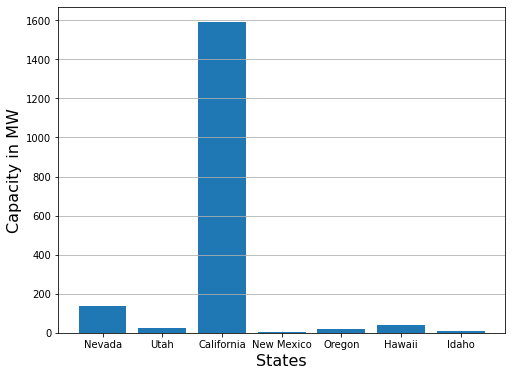

In [0]:
plt.figure(figsize=(8,6)) #calling the figure size
plt.bar(df.State, df.Capacity_MW) # Making a bar plot with state on the X axis, capacity on the Y
plt.xlabel('States', size=16) # Just a x axis label, size 16
plt.ylabel('Capacity in MW', size = 16)
plt.grid(True, axis='y') # turning on grid lines, only for the Y axis

# You can drag and drop the figure to save it
# plt.savefig('figurename.png', dpi=300) 


Let's make a scatter plot with similar data

Text(0, 0.5, 'Capacity in MW')

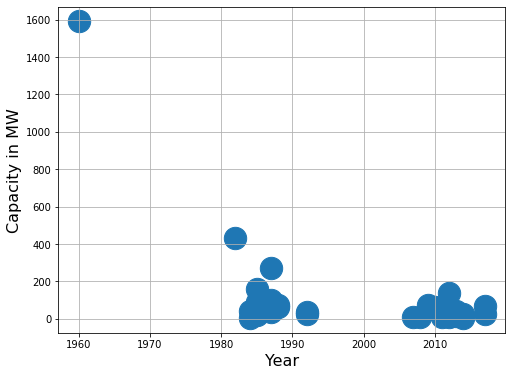

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(df.Year.values, df.Capacity_MW.values, s=500 ) # hint! Look here
plt.grid(True)

plt.xlabel('Year', size=16)
plt.ylabel('Capacity in MW', size = 16)

This size is wrong on the bubble, play around with the plot to find the right size. 

Text(0, 0.5, 'Capacity in MW')

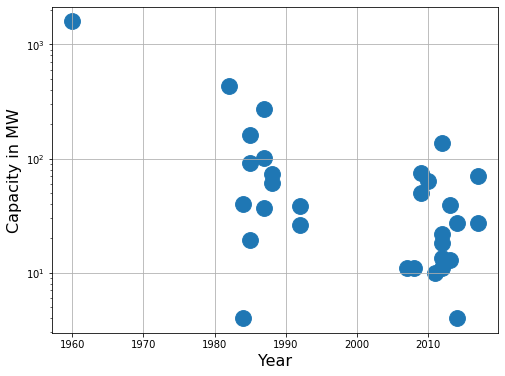

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(df.Year.values, df.Capacity_MW.values, s=250 )
plt.grid(True)
plt.yscale('log') #


plt.xlabel('Year', size=16)
plt.ylabel('Capacity in MW', size = 16)

If you think having a log axis works better with this data. Spend 5-10 minutes during the break changing some variables, and try to change the color in the scatter plot. Next code cell is supposed to be empty.

### Break #1!



# Well log input and output using LasIO

LasIO (.las input and output) is one of my all time favorite packages. It's updated often, and it works 99.5% of the time with .las files (well logs, not LiDAR data). The github is [here](https://github.com/kinverarity1/lasio). A quick note is all of this is just examples, no promises of petrophysical sense!

In [0]:
las = lasio.read('4900722147_722147B.las')

We just read in a las file! Let's do a quick quaility control, and make some plots.

In [0]:
las.curves

[CurveItem(mnemonic=DEPT, unit=F, value=, descr=DEPTH (BOREHOLE) {F13.5}, original_mnemonic=DEPT, data.shape=(20587,)),
 CurveItem(mnemonic=AHO10, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A10 {F13.4}, original_mnemonic=AHO10, data.shape=(20587,)),
 CurveItem(mnemonic=AHO20, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A20 {F13.4}, original_mnemonic=AHO20, data.shape=(20587,)),
 CurveItem(mnemonic=AHO30, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A30 {F13.4}, original_mnemonic=AHO30, data.shape=(20587,)),
 CurveItem(mnemonic=AHO60, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A60 {F13.4}, original_mnemonic=AHO60, data.shape=(20587,)),
 CurveItem(mnemonic=AHO90, unit=OHMM, value=, descr=Array Induction One Foot Resistivity A90 {F13.4}, original_mnemonic=AHO90, data.shape=(20587,)),
 CurveItem(mnemonic=BS, unit=IN, value=, descr=Bit Size {F13.4}, original_mnemonic=BS, data.shape=(20587,)),
 CurveItem(mnemonic=CDF, u

Wow, this well has a lot of curves! OK, we are going to make a data frame for the data in the .las file. This will behave really similar to the previous data frame

In [0]:
data = las.df() # This time we named the dataframe data and not df
data.head(3)

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,DPHZ,EHGR,FCD,GR,HCAL,HDRA,HGR,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
DEPT,,,,,,,,,,,,,,,,,,,,,,,,,,,
264.57275,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,714.3266,94.4001,0.0157,-0.51861,-0.5117,62.9528,7.0,57.5765,8.7657,0.8911,61.5717,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.6761,903.50800
264.65608,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,706.3282,94.4001,0.0157,-0.51861,-0.5117,62.9528,7.0,57.5765,8.7657,0.8911,61.5717,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.5199,899.50816
264.73941,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,698.3297,94.4001,0.0157,-0.51861,-0.5117,61.1155,7.0,57.5765,8.7657,0.8911,59.7747,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.3636,895.50832


Scroll around! If you want to get a handle on stats of your well curves, using the describe function on a dataframe is awesome. 

In [0]:
data.to_csv('well_data.csv') # just saved it out!

Once this is in a data frame, you can export the curve data as a csv! This can be used in excel, spotfire, matlab or any other program you are more familiar with. This alone saves tons of time! While I prefer python, I know it's not for everyone.

In [0]:
data.describe()

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,DPHZ,EHGR,FCD,GR,HCAL,HDRA,HGR,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
count,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.00,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.0,20587.000000,20587.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20526.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000
mean,32.252442,34.950929,31.329049,27.927270,27.410640,8.75,676.743216,98.415896,0.604529,1.979741,1.983869,103.408938,7.0,98.657851,9.354361,0.020861,98.662439,32.480518,30.536038,0.354168,0.350520,2.633982,2.378150,75.528476,95.113983,-204.752749,1127.159692
std,128.857713,140.897812,103.180496,65.327454,62.005216,0.00,58.856309,2.063567,0.763592,33.070237,33.070029,29.508451,0.0,27.748973,0.762442,0.115197,28.603177,122.967020,110.639868,0.122171,0.109249,1.030962,0.243767,335.963370,427.417809,25.678274,169.538997
min,1.390700,1.575200,1.617800,1.696000,1.692500,8.75,-47.630800,94.400100,-5.538100,-1.199270,-0.801500,14.501400,7.0,14.818800,3.211900,-0.024500,13.126700,0.088000,0.098000,0.079420,0.101640,0.900000,1.207080,0.079030,0.044180,-258.340900,265.016600
25%,3.698500,4.027950,4.242050,4.588850,4.585250,8.75,657.181250,96.376600,0.322000,0.121195,0.130000,82.076900,7.0,78.332950,9.065300,-0.009400,78.283300,8.775450,7.776900,0.274150,0.276935,2.176795,2.323168,10.977510,11.351180,-218.790850,993.186120
50%,17.888500,18.315800,18.586600,18.668400,18.827100,8.75,677.837400,98.353000,0.570400,0.156360,0.160700,108.148800,7.0,102.271700,9.318800,-0.004600,102.443300,18.257100,18.035600,0.330620,0.328380,2.580130,2.392280,29.029920,29.143410,-201.691900,1135.970200
75%,29.044600,29.038150,29.255450,29.894550,29.507250,8.75,702.729100,100.329500,0.829150,0.198580,0.202400,124.792850,7.0,119.445750,9.579500,0.009400,119.703650,26.987650,26.212000,0.408290,0.406300,2.905518,2.450400,46.963240,48.894250,-186.484350,1265.619160
max,1950.000000,1950.000000,1699.496400,1294.100300,1097.065100,8.75,794.634900,100.329500,5.340600,607.212100,607.212100,217.478100,7.0,194.760500,14.090600,2.109400,211.141600,2065.122000,1849.720400,1.174630,1.200880,10.000000,4.628800,4896.128690,4960.920260,-74.894900,1634.082460


If you want to save out this table as a csv, you can do that in one line:

In [0]:
data.describe().to_csv("petro-stats.csv")

In [0]:
data.AHO10.min() # If you just want one of the stats

1.3907

Let's use the quantile function to make some quick cutoffs (will be used in the future).

In [0]:
lowGR = data.GR.quantile(.20)
lowGR

72.89142

In [0]:
highRES = data.AHO90.quantile(.90)
highRES

46.89314000000001

Feel free to make your own cutoffs here!

### Plotting up well log data

Text(0, 0.5, 'Deep Resistivity')

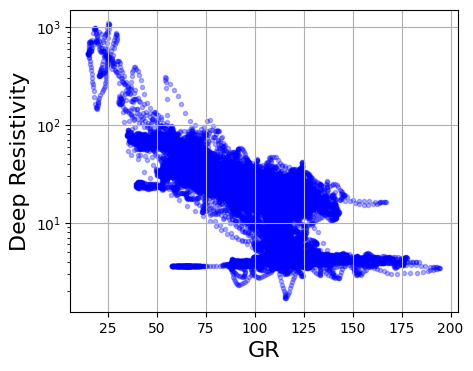

In [0]:
# Cross plot comparing GR to Deep Resistivity
plt.figure(figsize=(5,4), dpi=100) # figure size and dpi you can set here
plt.scatter(data.GR.values, data.AHO90.values, color='blue', marker='.', alpha=0.3)
plt.yscale('log') #log scale for Y axis

plt.grid(True)
plt.xlabel('GR', size=16)
plt.ylabel('Deep Resistivity', size=16)

Text(0, 0.5, 'Count')

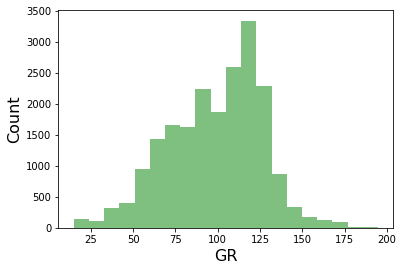

In [0]:
# lets make a histogram of the GR Curve, with 20 bins, in green
plt.hist(data.GR.values, bins = 20, color='g', alpha = 0.5)
plt.xlabel('GR', size=16)
plt.ylabel('Count', size=16)

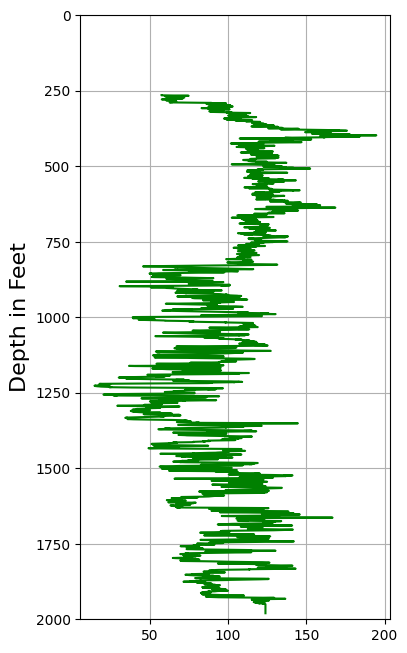

In [0]:
# line plot of the Gamma curve
plt.figure(figsize=(4,8), dpi=100)
plt.plot(data.GR.values, data.index, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.ylim(2000,0)
plt.grid(True)


Let's add a depth track for deep resistivity, a title and a few other additional widigits. Also we will use the well name for the title:

In [0]:
las.header['Well'].WELL.value # we can pull the well name directly from the header

'AR FEE 1791 15-23'

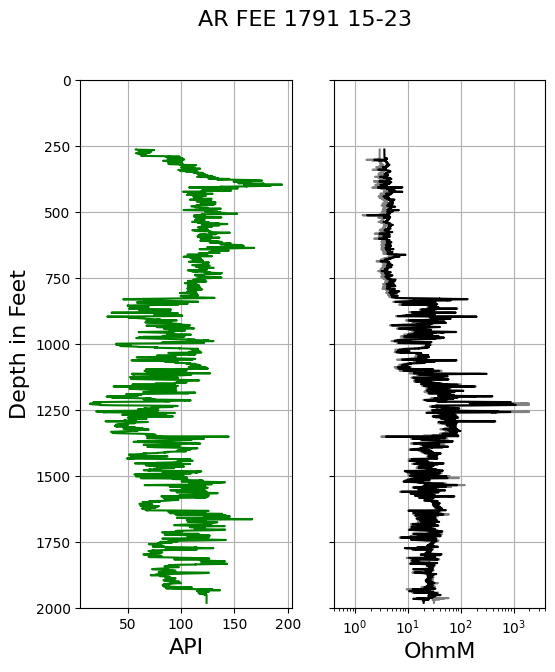

In [0]:
# line plot of the Gamma curve
plt.figure(figsize=(6,7), dpi=100)

plt.suptitle(las.header['Well'].WELL.value, size =16) # overall title

plt.subplot(121) # if we are going to make two plots, matplotlib calls it a subplot
plt.plot(data.GR.values, data.index, color='g') # the actual plot!
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('API', size=16)
plt.ylim(2000,0) # the limit is reversed to go deep down
plt.grid(True) # Turning the grid on

plt.subplot(122)
plt.plot(data.AHO10.values, data.index, color='grey')
plt.plot(data.AHO90.values, data.index, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.4,4000)
plt.ylim(2000,0)
plt.xlabel('OhmM', size=16)
plt.tick_params(labelleft=False)  

plt.savefig('awesome-plot.pdf', dpi=200)

Let's add a pay flag, remember the cutoffs we calcualted above? Let's use those. Using pythonic nomenclature, we will set a true flag, only when both conditions are met.

In [0]:
payMapper = (data.GR.values <= lowGR) & (data.AHO90.values >= highRES)
np.unique(payMapper)

array([False,  True])

If we want to see how many true and false statements there are:

In [0]:
np.bincount(payMapper)

array([18775,  1812])

So the GR values have to be below the cutoff, and resistivity have to be above the cutoff.

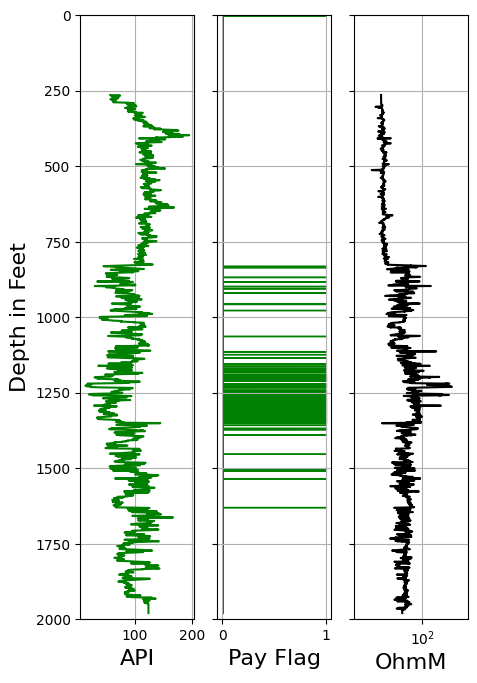

In [0]:
# line plot of the Gamma curve
plt.figure(figsize=(5,8), dpi=100)

plt.subplot(131) # the subplot changed to allow for 3 columns
plt.plot(data.GR.values, data.index, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('API', size=16)
plt.ylim(2000,0)
plt.grid(True)

plt.subplot(132) # this is the new pay flag plot
plt.fill_between(payMapper, data.index, color='g') # used fill between, not plot
plt.ylim(2000,0)
plt.tick_params(labelleft=False)  
plt.xlabel('Pay Flag', size=16)
plt.grid(True)

plt.subplot(133)
plt.plot(data.AHO90.values, data.index, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.4,4000)
plt.ylim(2000,0)
plt.xlabel('OhmM', size=16)
plt.tick_params(labelleft=False)  



Little heavy on the pay flag! But a good template for future work. Can be used for any sort of cutoff, or statistical analysis. Mess around with a plot below!

### Break #2

# Striplog

Striplog is an awesome package for  basic graphic logs, stratigraphic information, formations, and other geo stuff. The github is [here](https://github.com/agile-geoscience/striplog). This heavily borrows from [tutorials](https://github.com/agile-geoscience/striplog/tree/master/tutorial).

In [0]:
!pip install striplog

     |████████████████████████████████| 81kB 3.9MB/s 
  Created wheel for striplog: filename=striplog-0.8.5-cp36-none-any.whl size=80744 sha256=0496678daabc16d9b161f987980b7e919b8e16e250ae5ea9713eee7f8afc0281
  Stored in directory: /root/.cache/pip/wheels/a6/09/bd/87093a5be4a55cc7cacf9668e2dc0f3c905a1621b120af4820
Successfully built striplog


In [0]:
import striplog
striplog.__version__ #if this fails, just re run the above cells

'0.8.5'

### Lexicon

Striplog has a lot of geowords already preloaded. Think sand, shale, mudstone, salt, etc:

In [0]:
from striplog import Lexicon
print(Lexicon.__doc__)


    A Lexicon is a dictionary of 'types' and regex patterns.

    Most commonly you will just load the default one.

    Args:
        params (dict): The dictionary to use. For an example, refer to the
            default lexicon in ``defaults.py``.
    


In [0]:
lexicon = Lexicon.default()
lexicon #scroll around!

{'lithology': ['overburden', 'sandstone', 'siltstone', 'shale', 'mudstone', 'limestone', 'dolomite', 'salt', 'halite', 'anhydrite', 'gypsum', 'sylvite', 'clay', 'mud', 'silt', 'sand', 'gravel', 'boulders'], 'amount': ['streaks?', 'veins?', 'stringers?', 'interbed(?:s|ded)?', 'blotch(?:es)?', 'bands?', 'fragments?', 'impurit(?:y|ies)', 'minor', 'some', 'abundant', 'rare', 'flakes?', '[-\\.\\d]+%'], 'grainsize': ['vf(?:-)?', 'f(?:-)?', 'm(?:-)?', 'c(?:-)?', 'vc', 'very fine(?: to)?', 'fine(?: to)?', 'medium(?: to)?', 'coarse(?: to)?', 'very coarse', 'v fine(?: to)?', 'med(?: to)?', 'med.(?: to)?', 'v coarse', 'grains?', 'granules?', 'pebbles?', 'cobbles?', 'boulders?'], 'colour': ['red(?:dish)?', 'gray(?:ish)?', 'grey(?:ish)?', 'black(?:ish)?', 'whit(?:e|ish)', 'blu(?:e|ish)', 'purpl(?:e|ish)', 'yellow(?:ish)?', 'green(?:ish)?', 'brown(?:ish)?', 'light', 'dark', 'sandy'], 'synonyms': {'Overburden': ['Drift'], 'Anhydrite': ['Gypsum'], 'Salt': ['Halite', 'Sylvite']}, 'splitters': [' with '

In [0]:
lexicon.synonyms

{'Anhydrite': ['Gypsum'],
 'Overburden': ['Drift'],
 'Salt': ['Halite', 'Sylvite']}

These abbrevations are common for mudlogs, there is a great turtorial on the github if you are interested in that

In [0]:
s = "grysh gn ss w/ sp gy sh"
lexicon.expand_abbreviations(s)

'greyish green sandstone with spotty gray shale'

### Componet

In [0]:
from striplog import Component

In [0]:
print(Component.__doc__)


    Initialize with a dictionary of properties. You can use any
    properties you want e.g.:

        - lithology: a simple one-word rock type
        - colour, e.g. 'grey'
        - grainsize or range, e.g. 'vf-f'
        - modifier, e.g. 'rippled'
        - quantity, e.g. '35%', or 'stringers'
        - description, e.g. from cuttings
    


We define a new rock with a Python dict object:

In [0]:
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand'}
rock = Component(r)
rock

colour,grey
grainsize,vf-f
lithology,sand


You can now call these componets!

In [0]:
rock['colour'] # who spelled this?! < Matt Hall/>

'grey'

In [0]:
rock.summary()

'Grey, vf-f, sand'

In [0]:
rock.summary(fmt="My rock: {lithology} ({colour}, {grainsize!u})")

'My rock: sand (grey, VF-F)'



The formatting supports the usual s, r, and a:

    s: str
    r: repr
    a: ascii

Also some string functions:

    u: str.upper
    l: str.lower
    c: str.capitalize
    t: str.title

And some numerical ones, for arrays of numbers:

    + or ∑: np.sum
    m or µ: np.mean
    v: np.var
    d: np.std
    x: np.product



### Position

Positions define points in the earth, like a top, but with uncertainty. You can define:

    upper — the highest possible location
    middle — the most likely location
    lower — the lowest possible location
    units — the units of measurement
    x and y — the x and y location (these don't have uncertainty, sorry)
    meta — a Python dictionary containing anything you want

Positions don't have a 'way up'.

In [0]:
from striplog import Position
print(Position.__doc__)


    Used to represent a position: a top or base.

    Not sure whether to go with upper-middle-lower or z_max, z_mid, z_min.
    Sticking to upper and lower, because ordering in Intervals is already
    based on 'above' and 'below'.
    


In [0]:
params = {'upper': 95,
          'middle': 100,
          'lower': 110,
          'meta': {'kind': 'erosive', 'source': 'DOE'}
          }

p = Position(**params)
p

upper,95.0
middle,100.0
lower,110.0


Even if you don't give a middle, you can always get z: the central, most likely position:

In [0]:
params = {'upper': 75, 'lower': 85}
p = Position(**params)
p

upper,75.0
middle,
lower,85.0


In [0]:
p.z

80.0

## Let's make a striplog!

I just introduced a bunch of boring things about dictionaries, etc. What makes this nice once you get it setup, is you can make some templates for common formations and lithotypes. We are going to do a simple one from this [github](https://github.com/ThomasMGeo/CSV2Striplog)

In [0]:
from striplog import Lexicon, Decor, Component, Legend, Interval, Striplog


### Make a legend

Most of the stuff in the dicts you made were about display — so they are going to make Decor objects. A collection of Decors makes a Legend. A Legend determines how a striplog is displayed.

First I'll make the components, since those are easy. I'll move 'train' into there too, since it is to do with the rocks, not the display. If it seems weird having 'train' in the Component (which is really supposed to be about direct descriptions of the rock, but the idea is that it's always the same for all specimens of that rock so it does fit here) then you could put it in data instead.


In [0]:
facies = {
    's': Component({'lithology': 'sandstone', 'train':'y'}),
    'i': Component({'lithology': 'interbedded', 'train':'y'}),
    'sh': Component({'lithology': 'shale', 'train':'y'}),
}

The next block of text could be less lines of code. The indenting is just a way to make it easier to read. Everyone has there own style of programming. We are just setting the decor of our future striplog plot. 

In [0]:
sandstone = Decor({
    'component': facies['s'],
    'colour': 'yellow',
    'hatch': '.',
    'width': '3',
})

interbedded = Decor({
    'component': facies['i'],
    'colour': 'darkseagreen',
    'hatch': '--',
    'width': '2',
})

shale = Decor({
    'component': facies['sh'],
    'colour': 'darkgray',
    'hatch': '-',
    'width': '1',
})


In [0]:
legend = Legend([sandstone, interbedded, shale])
legend

Legend(Decor({'component': Component({'lithology': 'sandstone', 'train': 'y'}), '_colour': '#ffff00', 'hatch': '.', 'width': 3.0})
Decor({'component': Component({'lithology': 'interbedded', 'train': 'y'}), '_colour': '#8fbc8f', 'hatch': '--', 'width': 2.0})
Decor({'component': Component({'lithology': 'shale', 'train': 'y'}), '_colour': '#a9a9a9', 'hatch': '-', 'width': 1.0}))

In [0]:
strip = Striplog.from_csv('t20-lith.csv')
strip[0]

Interval({'top': Position({'middle': 2200.0, 'units': 'm'}), 'base': Position({'middle': 2300.329, 'units': 'm'}), 'description': '', 'data': {'lithology': 's'}, 'components': []})


##Deal with lithology¶

The lithology has been turned into a component, but it's using the abbreviation... I can't figure out an elegant way to deal with this so, for now, we'll just loop over the striplog and fix it. We read the data item's lithology ('s' in the top layer), then look up the correct lithology name in our abbreviation dictionary, then add the new component in the proper place. Finally, we delete the data we had.


In [0]:
strip[0].data

{'lithology': 's'}

In [0]:
for s in strip:
    lith = s.data['lithology']
    s.components = [facies[lith]]
    s.data = {}
# Run once, not twice

In [0]:
strip[0]

Interval({'top': Position({'middle': 2200.0, 'units': 'm'}), 'base': Position({'middle': 2300.329, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'train': 'y'})]})

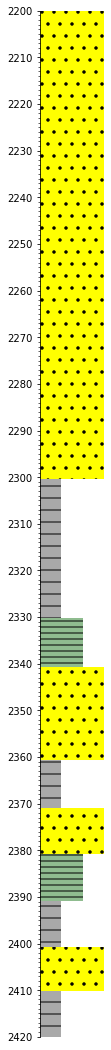

In [0]:
strip.plot(legend)

Just plotted a simple strip log from a CSV! You can make striplogs 100 different ways, and I highly reccomend the turtorials on the github for more exploration. 

# Closing Thoughts


*   Start small, try to replicate current workflows
*   Know that in the beginning that stuff will take longer amounts of time
*   Try to work on a problem on your own for a little bit, but don't be afraid of asking for help on swung or stack overflow
*   Colab is great for quick analysis and some machine learning workflows, but doing a normal install of [Anaconda](https://www.anaconda.com/) on your own machine is a good idea for more advanced analysis or specific packages. 
*   Have fun! Sometimes it can be frustrating, but a quick walk or sleeping on problems can also help
*   Be excellent to each other

*fin!*